## Predicting Hotel Guest Cancellation
### Sakher Alqa. - UGA.EDU

In [5]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [32]:
#more clarifications on values
for col in df.columns:
    print(f'feature: {col}')
    df_g = df.groupby(col)
    s = str(df_g.size()).split('\n')
    #printing first 5 lines
    for x in range(0,4):
        print(s[x])
    print('---')

feature: hotel
hotel
City Hotel      2569
Resort Hotel    1038
dtype: int64
---
feature: is_canceled
is_canceled
0    1200
1    2407
dtype: int64
---
feature: stays_in_weekend_nights
stays_in_weekend_nights
0     1589
1      892
2      964
---
feature: stays_in_week_nights
stays_in_week_nights
0     247
1     984
2     993
---
feature: adults
adults
0       13
1      883
2     2545
---
feature: children
children
0.0     3322
1.0      152
2.0      130
---
feature: babies
babies
0    3590
1      17
dtype: int64
---
feature: meal
meal
BB           2864
FB             28
HB            320
---
feature: country
country
AGO    72
ALB     1
ARE     2
---
feature: market_segment
market_segment
Aviation           18
Complementary      26
Corporate         170
---
feature: distribution_channel
distribution_channel
Corporate     219
Direct        483
GDS             5
---
feature: is_repeated_guest
is_repeated_guest
0    3493
1     114
dtype: int64
---
feature: previous_cancellations
previous_canc

In [8]:
#dropping unnecessary features
df = df.drop(columns=[
'lead_time',
'arrival_date_year',
'arrival_date_month',
'arrival_date_week_number',
'arrival_date_day_of_month',
'adr',
'reservation_status_date',
])
df

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,...,C,3,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out
1,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,...,C,4,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out
2,Resort Hotel,0,0,1,1,0.0,0,BB,GBR,Direct,...,C,0,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out
3,Resort Hotel,0,0,1,1,0.0,0,BB,GBR,Corporate,...,A,0,No Deposit,304.0,NaN,0,Transient,0,0,Check-Out
4,Resort Hotel,0,0,2,2,0.0,0,BB,GBR,Online TA,...,A,0,No Deposit,240.0,NaN,0,Transient,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2,5,2,0.0,0,BB,BEL,Offline TA/TO,...,A,0,No Deposit,394.0,NaN,0,Transient,0,0,Check-Out
119386,City Hotel,0,2,5,3,0.0,0,BB,FRA,Online TA,...,E,0,No Deposit,9.0,NaN,0,Transient,0,2,Check-Out
119387,City Hotel,0,2,5,2,0.0,0,BB,DEU,Online TA,...,D,0,No Deposit,9.0,NaN,0,Transient,0,4,Check-Out
119388,City Hotel,0,2,5,2,0.0,0,BB,GBR,Online TA,...,A,0,No Deposit,89.0,NaN,0,Transient,0,0,Check-Out


In [9]:
#y is imbalanced, class is reservation_status
#Canceled     43017, Check-Out    75166, No-Show       1207
#undersampling
Canceled_df = df[ df['reservation_status'] == 'Canceled' ]
Canceled_df = Canceled_df.sample(n = 1200)
Check_Out_df = df[ df['reservation_status'] == 'Check-Out' ]
Check_Out_df = Check_Out_df.sample(n = 1200)
df = df.drop( df[ df['reservation_status'] == 'Canceled' ].index )
df = df.drop( df[ df['reservation_status'] == 'Check-Out'].index )
df = df.append(Canceled_df)
df = df.append(Check_Out_df)

/tmp/ipykernel_5546/3569085873.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Canceled_df)
/tmp/ipykernel_5546/3569085873.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Check_Out_df)


In [10]:
#y is imbalanced, class is reservation_status
#Canceled     43017, Check-Out    75166, No-Show       1207
#copy No-Show 3 times , Oversampling
#df = df.append([ df[ df['reservation_status'] == 'No-Show' ] ] * 40 )
df_g = df.groupby('reservation_status')
print(df_g.size())

reservation_status
Canceled     1200
Check-Out    1200
No-Show      1207
dtype: int64


<AxesSubplot:xlabel='reservation_status'>

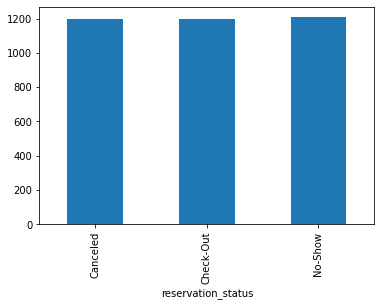

In [11]:
df_g.size().plot.bar()

In [12]:
#extract y
y = df['reservation_status']
df = df.drop(columns=['reservation_status'])

In [13]:
#encoding categorical features
enc = preprocessing.OrdinalEncoder()
X = enc.fit_transform(df,y)
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y

array([2, 2, 2, ..., 1, 1, 1])

In [14]:
#Impute
imputer = KNNImputer()
#imputer = SimpleImputer()
X = imputer.fit_transform(X)

In [15]:
#normalize
X = preprocessing.normalize(X)
X

array([[0.00742291, 0.00742291, 0.        , ..., 0.01484582, 0.        ,
        0.        ],
       [0.01212664, 0.01212664, 0.04850655, ..., 0.        , 0.        ,
        0.01212664],
       [0.00724854, 0.00724854, 0.01449708, ..., 0.01449708, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.05739076, ..., 0.05739076, 0.02869538,
        0.05739076],
       [0.        , 0.        , 0.        , ..., 0.05127643, 0.        ,
        0.        ],
       [0.02020305, 0.        , 0.02020305, ..., 0.06060915, 0.        ,
        0.        ]])

In [16]:
#extracting testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
#training
pipe = Pipeline(
    steps=[("svm", svm.SVC())]
)
param_grid = {
    "svm__C": [1.0],
}
search = GridSearchCV(pipe, param_grid, cv=10, verbose=3)
fit = search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .......................svm__C=1.0;, score=0.550 total time=   0.2s
[CV 2/10] END .......................svm__C=1.0;, score=0.554 total time=   0.2s
[CV 3/10] END .......................svm__C=1.0;, score=0.506 total time=   0.2s
[CV 4/10] END .......................svm__C=1.0;, score=0.524 total time=   0.2s
[CV 5/10] END .......................svm__C=1.0;, score=0.579 total time=   0.2s
[CV 6/10] END .......................svm__C=1.0;, score=0.515 total time=   0.2s
[CV 7/10] END .......................svm__C=1.0;, score=0.500 total time=   0.2s
[CV 8/10] END .......................svm__C=1.0;, score=0.507 total time=   0.2s
[CV 9/10] END .......................svm__C=1.0;, score=0.507 total time=   0.2s
[CV 10/10] END ......................svm__C=1.0;, score=0.515 total time=   0.2s


In [27]:
fit.score(X_test,y_test)

0.5011086474501109